In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

In [137]:
df_merged = pd.read_csv("../data/merged_datasetes_balanced_huge.csv")

In [138]:
df_merged.head()

,title,clickbait,set,char_capital,char_small,char_special,blank,numerical,letters,outlier
0,Boy arrested for murder after seventeen-year-o...,0,1,1,52,2,9,0,53,0
1,Canada unveils plans to legalise recreational ...,0,2,1,48,0,6,0,49,0
2,Martin Shkreli Wins Ruling Splitting Fraud Tri...,0,2,10,44,1,8,0,54,0
3,Your 2015 MLB Draft Prep Kit: Spending Strateg...,0,2,15,63,5,15,4,78,0
4,Oscars: The winners list,0,3,2,18,1,3,0,20,0


In [139]:
df_merged.shape

(40000, 10)

In [140]:
%run 0-Function-Helper.ipynb

In [141]:
x_train, x_test, y_train, y_test = train_test_split(
    df_merged["title"], 
    df_merged["clickbait"],
    test_size=0.2, 
    random_state=42,
    stratify=df_merged["clickbait"]
)

x_test, x_val, y_test, y_val = train_test_split(
    x_test, 
    y_test,
    test_size=0.5,  # 50% of the original x_test size for validation
    random_state=42,
    stratify=y_test
)

# Raw dataset

In [142]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_val = vectorization.transform(x_val)

In [143]:
xv_train.shape

(32000, 25335)

In [144]:
mask = y_train.astype(bool).values
fake_news_centroid = np.array(xv_train[mask].mean(axis=0)).ravel()
no_fake_news_centroid = np.array(xv_train[~mask].mean(axis=0)).ravel()

In [145]:
xv_train.shape

(32000, 25335)

In [146]:
fake_news_centroid.shape

(25335,)

In [147]:
no_fake_news_centroid.shape

(25335,)

In [148]:
fake_news_score = xv_val.dot(fake_news_centroid-no_fake_news_centroid)
fake_news_score.round(2)

array([-0.  , -0.  ,  0.  , ...,  0.01,  0.  ,  0.03])

In [149]:
x_val_df = pd.DataFrame(x_val)
print(x_val_df.shape)
x_val_df['clickbait'] = y_val
x_val_df['clickbait_score_model'] = MinMaxScaler().fit_transform(fake_news_score.reshape(-1,1))
x_val_df['clickbait_prediction'] = (x_val_df.clickbait_score_model > 0.3).astype(int)

(4000, 1)


In [150]:
x_val_df

,title,clickbait,clickbait_score_model,clickbait_prediction
16984,North Korea Vows to Produce Nuclear Weapons,0,0.126645,0
17575,Australian on death row in Vietnam for smuggli...,0,0.099152,0
33409,How to make Dorie Greenspan’s cheese and bacon...,1,0.311396,1
34351,"Which ""Orange Is The New Black"" Inmate Would B...",1,0.445386,1
7052,Philadelphia Mayor Proposes Temporary Tax Incr...,0,0.167793,0
...,...,...,...,...
23477,21 Insanely Creative Halloween Costumes For Yo...,1,0.631018,1
31227,Paying for President Trump's Travel and Securi...,1,0.073241,0
21368,"Here's What The Cast Of ""The Fresh Prince Of B...",1,0.487809,1
35611,Why Strategic Investment Isn't Always A Good S...,1,0.207744,0


In [151]:
predictions = x_val_df.clickbait_prediction

0.786 & 0.884 & 0.659 & 0.755 & None \
{'Accuracy': 0.78625, 'Precision': 0.8839704896042925, 'Recall': 0.659, 'F1 Score': 0.7550845030077341, 'ROC-AUC': None}

              precision    recall  f1-score   support

           0       0.73      0.91      0.81      2000
           1       0.88      0.66      0.76      2000

    accuracy                           0.79      4000
   macro avg       0.81      0.79      0.78      4000
weighted avg       0.81      0.79      0.78      4000



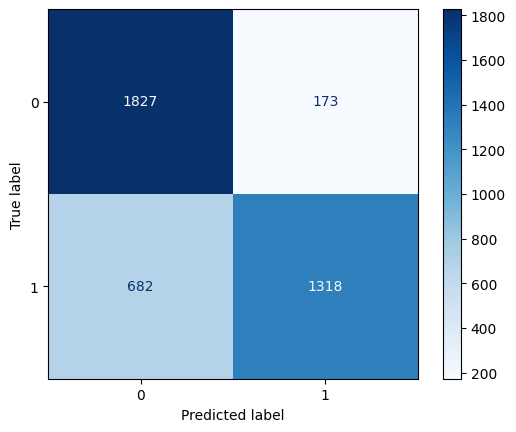

In [152]:
create_summary_for_model_metrics(y_val, predictions, None, "trivial_raw")

## Cleaned dataset

In [153]:
df_merged = pd.read_csv("../data/merged_datasetes_balanced_huge_cleaned.csv")

In [154]:
x_train, x_test, y_train, y_test = train_test_split(
    df_merged["title"], 
    df_merged["clickbait"],
    test_size=0.2, 
    random_state=42,
    stratify=df_merged["clickbait"]
)

x_test, x_val, y_test, y_val = train_test_split(
    x_test, 
    y_test,
    test_size=0.5,  # 50% of the original x_test size for validation
    random_state=42,
    stratify=y_test
)

In [155]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_val = vectorization.transform(x_val)

In [156]:
mask = y_train.astype(bool).values
fake_news_centroid = np.array(xv_train[mask].mean(axis=0)).ravel()
no_fake_news_centroid = np.array(xv_train[~mask].mean(axis=0)).ravel()

In [157]:
fake_news_centroid.shape

(24135,)

In [158]:
no_fake_news_centroid.shape

(24135,)

In [159]:
fake_news_score = xv_val.dot(fake_news_centroid-no_fake_news_centroid)

In [160]:
x_val_df = pd.DataFrame(x_val)
print(x_val_df.shape)
x_val_df['clickbait'] = y_val
x_val_df['clickbait_score_model'] = MinMaxScaler().fit_transform(fake_news_score.reshape(-1,1))
x_val_df['clickbait_prediction'] = (x_val_df.clickbait_score_model > 0.3).astype(int)

(4000, 1)


In [161]:
predictions = x_val_df.clickbait_prediction

0.782 & 0.747 & 0.852 & 0.797 & None \
{'Accuracy': 0.78225, 'Precision': 0.7474791758000877, 'Recall': 0.8525, 'F1 Score': 0.7965428638168652, 'ROC-AUC': None}

              precision    recall  f1-score   support

           0       0.83      0.71      0.77      2000
           1       0.75      0.85      0.80      2000

    accuracy                           0.78      4000
   macro avg       0.79      0.78      0.78      4000
weighted avg       0.79      0.78      0.78      4000



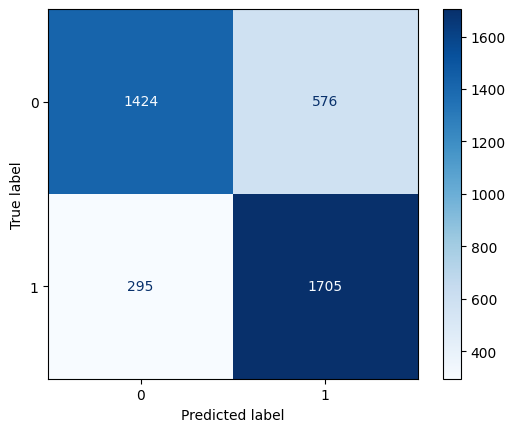

In [162]:
create_summary_for_model_metrics(y_val, predictions, None, "trivial_cleaned")